In [2]:
import os
import math
import function_list
from math_functions import roundup #,viz_functions
base_path,data_path,output = function_list.folder_setup()


In [3]:
os.chdir(data_path)
beds = pd.read_csv('bed_size.csv')
os.chdir(output)

In [4]:
#sort descending by Area
beds = df.sort_values(by='Area',ascending=False).reset_index(drop=True)

In [6]:
beds['Width CM']= beds['Width']*2.54
beds['Length CM'] = beds['Length']*2.54

In [123]:
def box_area_maker(df,x,y,xlabel=None,ylabel=None):

    fig = figure(figsize=(16,16))

    fig.suptitle('A Collection of US Bed Sizes',fontsize=36)

    ax = fig.add_subplot(111,aspect='equal')

    plt.subplots_adjust(top=.8)

    #plot rectangles

    for item in range(len(df)):
        ax.add_patch(patches.Rectangle((0,0),
                   width=df[x][item],edgecolor='black',
                   height=df[y][item],alpha=.6,facecolor=df['Color'][item],zorder=df.index[item]))

    #Annotate features
    bed_1 = [0,1,2,3,4,5,7,8,10,11]
    bed_2 = [6,9]

    for item in bed_1: #Due to overlap, need to breakout features
        ax.annotate(df['Bed'][item],xy=(df[x][item],df[y][item]),
                xytext=(df[x][item],df[y].max()+(int(beds[x].max().round(-1)/20))),arrowprops=dict(arrowstyle='-',
                                connectionstyle='arc3',alpha=.4,linewidth=.5),
                    ha='left',va='bottom',rotation=90,style='italic',zorder=10,fontsize=16)

    for item in (6,9):    
        ax.annotate(df['Bed'][item],xy=(df[x][item],df[y][item]),fontsize=16,
                    arrowprops=dict(arrowstyle="-",connectionstyle="arc3",alpha=.4,linewidth=.5),
        xytext=(df[x][item]-df[x].max()/15,df[y][item]-(df[y][item]/5)),
                    ha='left',va='bottom',rotation=0,style='italic',color='White',zorder=14)

    #set the x and y axis limits

    ax.set_xlim(0,roundup(df[x].max()))
    ax.set_ylim(0,roundup(df[y].max()))

    #set the tick intervals
    ax.xaxis.set_major_locator(mpl.ticker.MultipleLocator(int(beds[x].max().round(-1)/10)))
    ax.yaxis.set_major_locator(mpl.ticker.MultipleLocator(int(beds[y].max().round(-1)/10)))

    #label axes
    ax.set_xlabel(xlabel,fontsize=16)
    ax.set_ylabel(ylabel,fontsize=16)

    #format tick labels
    ax.tick_params(axis='both', which='major', labelsize=16,labelcolor='#737373')

    #remove grid
    ax.grid(False)

    ax.text(0,-.1,'Source: www.sizechart.com/home/bed-size/us/index.html',transform=ax.transAxes,fontsize=14,alpha=.4)

    ax.text(0,-.12,'www.igotcharts.com, 2017',transform=ax.transAxes,fontsize=14,alpha=.4)

    return fig, ax

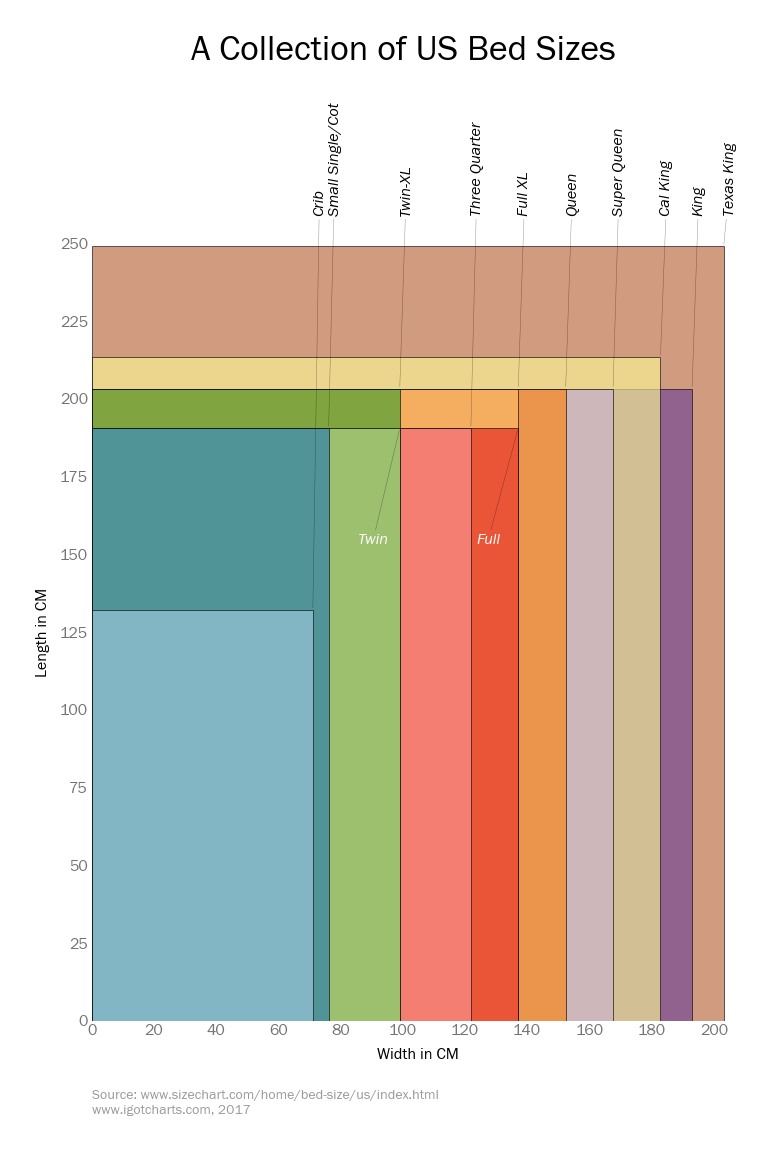

In [133]:
#Metric Bed
metric_beds = box_area_maker(beds,'Width CM','Length CM','Width in CM','Length in CM')
plt.savefig('Metric_Bed', 
           bbox_inches = 'tight', dpi = 300, pad_inches = .5,edgecolor = '#ffffff',facecolor = '#ffffff')

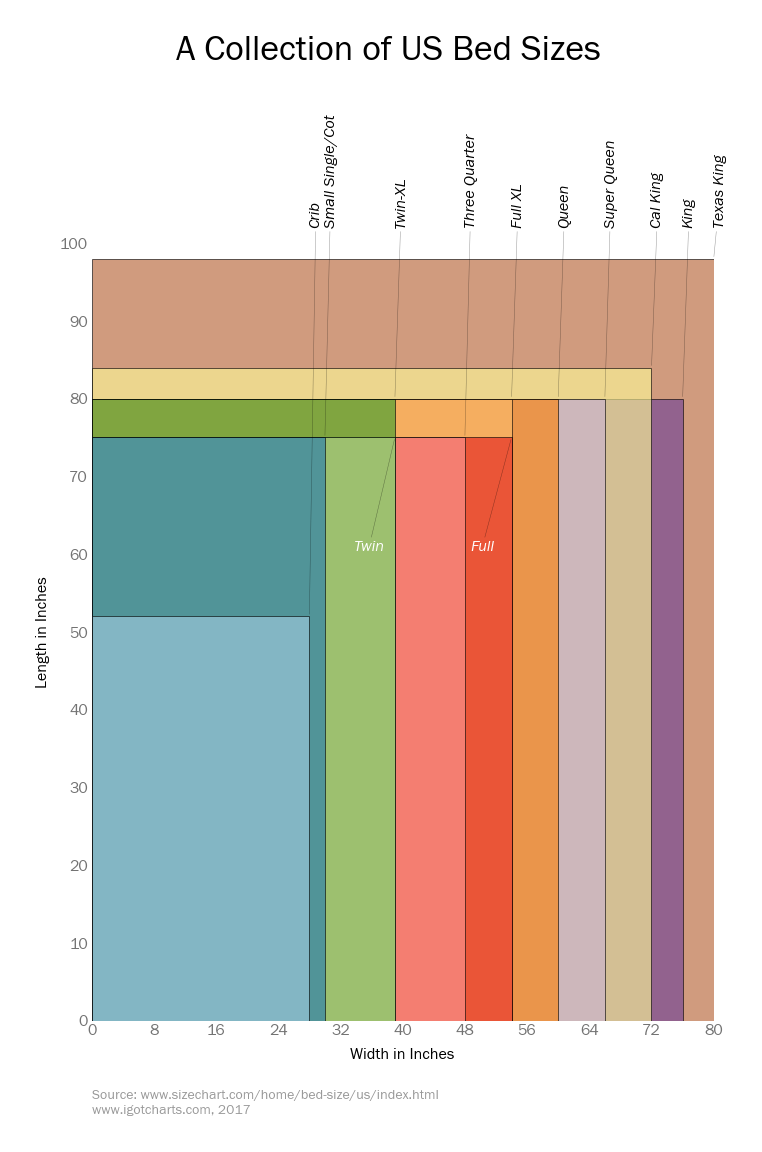

In [129]:
#US Beds
us_beds = metric_beds = box_area_maker(beds,'Width','Length','Width in Inches','Length in Inches')
plt.savefig('US_Bed', 
            bbox_inches = 'tight', dpi = 300, pad_inches = .5,edgecolor = '#ffffff',facecolor = '#ffffff')
